In [1]:
import pandas as pd
import requests

In [3]:
model = []
price = []
dealer = []
mileage = []
city = []
cylinder=[]
timeOnMarket = []
year = []
trim = []
driveline = []
transmission = []

cookies = {
    'OPTIMIZELY_USER_ID': 'c9ac0651-9a77-48dd-9965-756f26219198',
    'client_guid_timestamp': '2e8aac6f-1083-4fdc-8fe9-8f3f17a04ac8.1734204546198',
    '_gid': 'GA1.2.1803255735.1734204547',
    '_li_dcdm_c': '.autolist.com',
    '_lc2_fpi': '48675baae283--01jf3aar3xrnw3q9p9sert1qjp',
    '_lc2_fpi_meta': '%7B%22w%22%3A1734204547197%7D',
    '_pubcid': '3f17ed72-2c59-485b-8cfb-252d2f517926',
    '_pubcid_cst': 'zix7LPQsHA%3D%3D',
    '_sp_ses.8ca5': '*',
    '_fbp': 'fb.1.1734204548459.482573320642734739',
    '_gcl_au': '1.1.1993727286.1734204549',
    'panoramaId_expiry': '1734809351204',
    '_cc_id': '29a3c9ddd277a66f1b900c4f81af626',
    'panoramaId': '64141753236702b41eaa53f6b56f4945a7029e81bf1e900af28bc60578c84d53',
    'pbjs-unifiedid': '%7B%22TDID%22%3A%2214e5bfa3-1f98-45f0-8b03-52e538de23f4%22%2C%22TDID_LOOKUP%22%3A%22TRUE%22%2C%22TDID_CREATED_AT%22%3A%222024-11-14T19%3A29%3A11%22%7D',
    'pbjs-unifiedid_cst': 'zix7LPQsHA%3D%3D',
    '_uetsid': 'b0513650ba5111ef9e7dd1733f91372f',
    '_uetvid': 'b051c5b0ba5111efa3f8835715b4065d',
    '_ga': 'GA1.1.564265456.1734204547',
    'cto_bundle': 'L-VBjl9HWWJIclRvV0ZNZEZQSExKdEZTYmxOYyUyRmdJdVBQeThmRTczNGN3Vzg3cmNibVlwSWxOUmVJMVRwMnJIZk5XZk5MdENhSUpUTGxWNWZaMTB4VGJCUTV6b0taSWNZTGdmelZFd2R1bFBIY0Q4NExrV3ElMkY2Y0doaUM0QmxSZEZQRmRrVmEwWWFIRERkV3ZUQWhtalVSbEhRJTNEJTNE',
    'cto_bidid': 'WB_U8F9URGdBa25ZdEZqNFpzM0R2SWdGWXM1MFhpRktXd2FoSk8zdnJmdnJnVThFMnFRbDhjQ1JSJTJCTWlrSno1cExmdnQyVjVRNktUZTJLOUVRb241dW1FUXNLSUMlMkJWNXpZY2tBRWcxRk5lU1FFWTQlM0Q',
    '_session_id': '226ca33b7c71f74855eb0a2721b97a2b',
    '__gads': 'ID=8cc4c7f42cac9290:T=1734204549:RT=1734206565:S=ALNI_MbqgaPIxzcfgiTG-CtHEMHqgcE_CQ',
    '__gpi': 'UID=00000f73cda63b55:T=1734204549:RT=1734206565:S=ALNI_MaJ824K0MvcUOniPs3apZzHuGQA5w',
    '__eoi': 'ID=2658ad6a4b423f7c:T=1734204549:RT=1734206565:S=AA-AfjYiAYwH9nA0ixo_zOaCntdD',
    '_ga_KKZ1EQJKEV': 'GS1.1.1734204548.1.1.1734206570.0.0.0',
    '_sp_id.8ca5': '39806231-9ecf-429f-b5a5-81ba72f324f0.1734204548.1.1734206584.1734204548.e74e33fb-d4cf-4fc2-b455-156aa4212f80',
}

headers = {
    'accept': '*/*',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'no-cache',
    # 'cookie': 'OPTIMIZELY_USER_ID=c9ac0651-9a77-48dd-9965-756f26219198; client_guid_timestamp=2e8aac6f-1083-4fdc-8fe9-8f3f17a04ac8.1734204546198; _gid=GA1.2.1803255735.1734204547; _li_dcdm_c=.autolist.com; _lc2_fpi=48675baae283--01jf3aar3xrnw3q9p9sert1qjp; _lc2_fpi_meta=%7B%22w%22%3A1734204547197%7D; _pubcid=3f17ed72-2c59-485b-8cfb-252d2f517926; _pubcid_cst=zix7LPQsHA%3D%3D; _sp_ses.8ca5=*; _fbp=fb.1.1734204548459.482573320642734739; _gcl_au=1.1.1993727286.1734204549; panoramaId_expiry=1734809351204; _cc_id=29a3c9ddd277a66f1b900c4f81af626; panoramaId=64141753236702b41eaa53f6b56f4945a7029e81bf1e900af28bc60578c84d53; pbjs-unifiedid=%7B%22TDID%22%3A%2214e5bfa3-1f98-45f0-8b03-52e538de23f4%22%2C%22TDID_LOOKUP%22%3A%22TRUE%22%2C%22TDID_CREATED_AT%22%3A%222024-11-14T19%3A29%3A11%22%7D; pbjs-unifiedid_cst=zix7LPQsHA%3D%3D; _uetsid=b0513650ba5111ef9e7dd1733f91372f; _uetvid=b051c5b0ba5111efa3f8835715b4065d; _ga=GA1.1.564265456.1734204547; cto_bundle=L-VBjl9HWWJIclRvV0ZNZEZQSExKdEZTYmxOYyUyRmdJdVBQeThmRTczNGN3Vzg3cmNibVlwSWxOUmVJMVRwMnJIZk5XZk5MdENhSUpUTGxWNWZaMTB4VGJCUTV6b0taSWNZTGdmelZFd2R1bFBIY0Q4NExrV3ElMkY2Y0doaUM0QmxSZEZQRmRrVmEwWWFIRERkV3ZUQWhtalVSbEhRJTNEJTNE; cto_bidid=WB_U8F9URGdBa25ZdEZqNFpzM0R2SWdGWXM1MFhpRktXd2FoSk8zdnJmdnJnVThFMnFRbDhjQ1JSJTJCTWlrSno1cExmdnQyVjVRNktUZTJLOUVRb241dW1FUXNLSUMlMkJWNXpZY2tBRWcxRk5lU1FFWTQlM0Q; _session_id=226ca33b7c71f74855eb0a2721b97a2b; __gads=ID=8cc4c7f42cac9290:T=1734204549:RT=1734206565:S=ALNI_MbqgaPIxzcfgiTG-CtHEMHqgcE_CQ; __gpi=UID=00000f73cda63b55:T=1734204549:RT=1734206565:S=ALNI_MaJ824K0MvcUOniPs3apZzHuGQA5w; __eoi=ID=2658ad6a4b423f7c:T=1734204549:RT=1734206565:S=AA-AfjYiAYwH9nA0ixo_zOaCntdD; _ga_KKZ1EQJKEV=GS1.1.1734204548.1.1.1734206570.0.0.0; _sp_id.8ca5=39806231-9ecf-429f-b5a5-81ba72f324f0.1734204548.1.1734206584.1734204548.e74e33fb-d4cf-4fc2-b455-156aa4212f80',
    'pragma': 'no-cache',
    'priority': 'u=1, i',
    'referer': 'https://www.autolist.com/listings',
    'sec-ch-ua': '"Google Chrome";v="131", "Chromium";v="131", "Not_A Brand";v="24"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36',
}

for i in range(1, 500):

    params = {
        'ads': 'true',
        'include_total_price_change': 'true',
        'include_time_on_market': 'true',
        'include_relative_price_difference': 'true',
        'latitude': '0',
        'limit': '20',
        'longitude': '0',
        'make': 'Toyota',
        'page': str(i),
        'radius': 'Any',
        'zip': '',
    }

    response = requests.get('https://www.autolist.com/api/v2/search', params=params, cookies=cookies, headers=headers)
    results = response.json()['records']

    for result in results:
        model.append(result['make_and_model'])
        mileage.append(result['mileage'])
        city.append(result['city'])
        price.append(result['price'])
        cylinder.append(result['engine_cylinders'])
        dealer.append(result['dealer_name'])
        timeOnMarket.append(result['time_on_market'])
        year.append(result['year'])
        trim.append(result['trim'])
        driveline.append(result['driveline'])
        transmission.append(result['transmission'])

df_all = pd.DataFrame({
    'model': model,
    'price': price,
    'mileage': mileage,
    'cylinder': cylinder,
    'daysOnMarket': timeOnMarket,
    'city': city,
    'dealer':dealer,
    'year': year,
    'trim': trim,
    'driveline': driveline,
    'transmission': transmission
})

In [2]:
# df_all = pd.read_csv('cars_data.csv')

In [3]:
df_all.shape

(4980, 12)

In [4]:
df_tacoma = df_all[df_all['model'] == 'toyota_tacoma']

In [5]:
df_tacoma.price.describe()

count      653.000000
mean     40158.098009
std       8466.235391
min      16485.000000
25%      34901.000000
50%      39104.000000
75%      46134.000000
max      68475.000000
Name: price, dtype: float64

In [6]:
# General imports
from pathlib import Path
import datetime

# Computational imports
import numpy as np   # Library for n-dimensional arrays
import pandas as pd  # Library for dataframes (structured data)

# ML imports
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# I like to disable my Notebook Warnings.
import warnings
warnings.filterwarnings('ignore')

# Set seeds to make the experiment more reproducible.
from numpy.random import seed
seed(1)

# Allows us to see more information regarding the DataFrame
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

## EDA/Visualizations

In [7]:
df_tacoma.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 4942
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    653 non-null    int64  
 1   model         653 non-null    object 
 2   price         653 non-null    int64  
 3   mileage       604 non-null    float64
 4   cylinder      626 non-null    float64
 5   daysOnMarket  653 non-null    int64  
 6   city          653 non-null    object 
 7   dealer        653 non-null    object 
 8   year          653 non-null    int64  
 9   trim          653 non-null    object 
 10  driveline     653 non-null    object 
 11  transmission  648 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 66.3+ KB


In [8]:
df_tacoma.dtypes

Unnamed: 0        int64
model            object
price             int64
mileage         float64
cylinder        float64
daysOnMarket      int64
city             object
dealer           object
year              int64
trim             object
driveline        object
transmission     object
dtype: object

In [9]:
df_tacoma.describe()

,Unnamed: 0,price,mileage,cylinder,daysOnMarket,year
count,653.000000,653.000000,604.000000,626.000000,653.000000,653.000000
mean,2296.664625,40158.098009,17602.197020,4.571885,35.171516,2022.957121
std,1241.460848,8466.235391,27589.120883,0.904447,37.412040,2.126664
min,0.000000,16485.000000,1.000000,4.000000,0.000000,2007.000000
25%,1350.000000,34901.000000,7.000000,4.000000,12.000000,2023.000000
50%,2359.000000,39104.000000,14.000000,4.000000,23.000000,2024.000000
75%,3265.000000,46134.000000,27508.000000,6.000000,44.000000,2024.000000
max,4942.000000,68475.000000,155640.000000,6.000000,288.000000,2025.000000


In [10]:
def get_all_cols(df, target_col, exclude=[]):

    # Select categorical columns
    object_cols = [colname for colname in df.columns
                   if df[colname].dtype == 'object']
    
    # Select numerical columns
    num_cols = [colname for colname in df.columns
                if df[colname].dtype in ['int64','float64','uint8']]
    
    all_col = object_cols + num_cols

    exclude_cols = exclude + [target_col]

    feature_cols = [col for col in all_col if col not in exclude_cols]

    return object_cols, num_cols, feature_cols

In [11]:
object_cols, num_cols, feature_cols = get_all_cols(df_tacoma,"price")

In [12]:
print(object_cols)
print(num_cols)
print(feature_cols)

['model', 'city', 'dealer', 'trim', 'driveline', 'transmission']
['Unnamed: 0', 'price', 'mileage', 'cylinder', 'daysOnMarket', 'year']
['model', 'city', 'dealer', 'trim', 'driveline', 'transmission', 'Unnamed: 0', 'mileage', 'cylinder', 'daysOnMarket', 'year']


In [13]:
for object_col in object_cols:
    print(f'{object_col}:{df_tacoma[object_col].nunique()}\n')

model:1

city:42

dealer:55

trim:15

driveline:2

transmission:2



In [14]:
colors = sns.color_palette('pastel')
sns.set(rc={'figure.figsize':(8,6)})
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rc('legend', fontsize=13)
plt.rc('font', size=13)
sns.set_style('white')

<AxesSubplot:xlabel='trim', ylabel='price'>

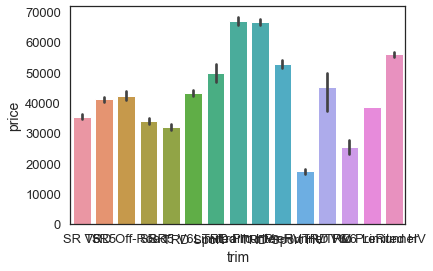

In [15]:
sns.barplot(data=df_tacoma, x='trim', y='price')

<AxesSubplot:xlabel='driveline', ylabel='price'>

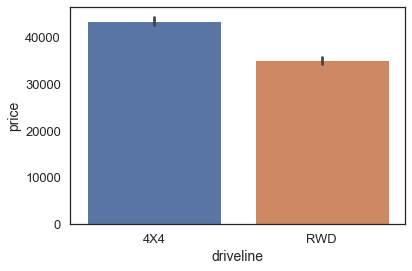

In [16]:
sns.barplot(data=df_tacoma, x='driveline', y='price')

<AxesSubplot:xlabel='transmission', ylabel='price'>

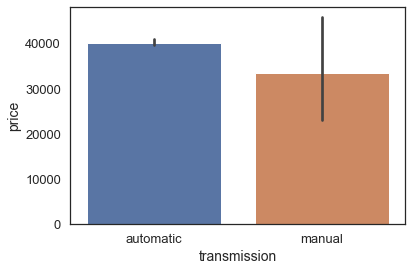

In [17]:
sns.barplot(data=df_tacoma, x='transmission', y='price')

<AxesSubplot:xlabel='year'>

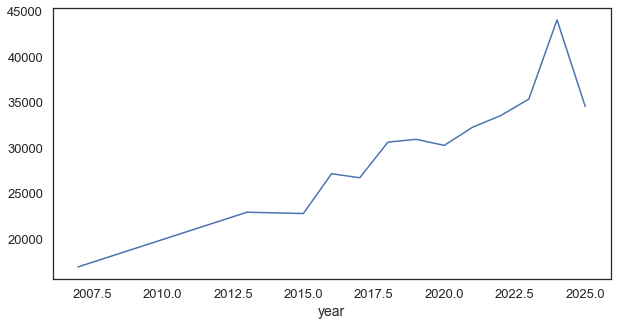

In [18]:
df_tacoma_year = df_tacoma.groupby(['year'])['price'].mean()
df_tacoma_year.plot(figsize=(10,5))

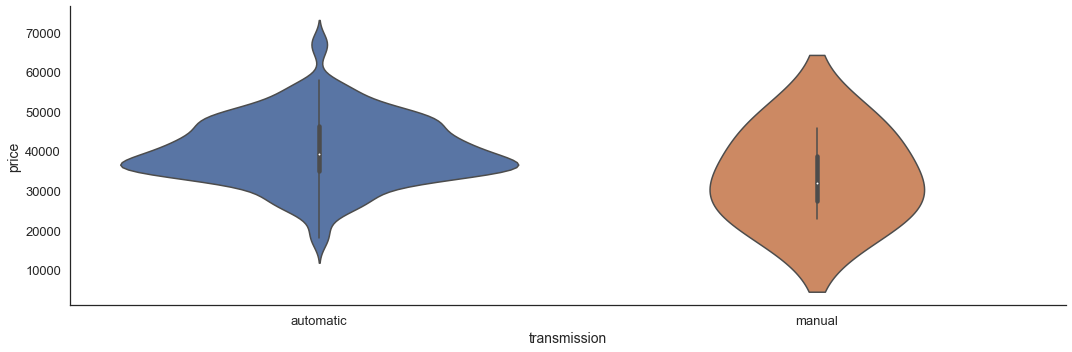

In [19]:
sns.catplot(x='transmission', y='price', data=df_tacoma.sort_values('price', ascending = False), kind='violin', height=5, aspect=3)
plt.show()

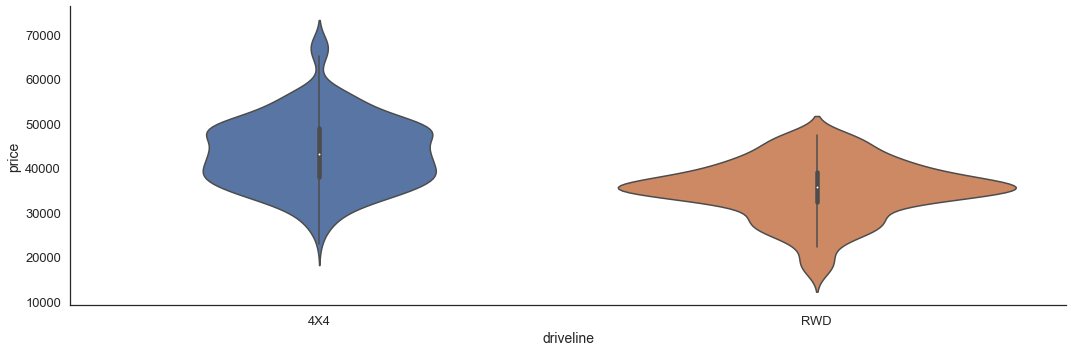

In [20]:
sns.catplot(x='driveline', y='price', data=df_tacoma.sort_values('price', ascending = False), kind='violin', height=5, aspect=3)
plt.show()

## Prepare the Data

In [21]:
TARGET = 'price'

In [22]:
now = datetime.datetime.now()
df_tacoma['year_old'] = now.year - df_tacoma['year']
df_tacoma.drop(["year"], axis=1, inplace=True)

In [23]:
df_tacoma.head()

,Unnamed: 0,model,price,mileage,cylinder,daysOnMarket,city,dealer,trim,driveline,transmission,year_old
0,0,toyota_tacoma,34599,59972.0,6.0,24,Montclair,IE Motors Direct,SR V6,4X4,automatic,2
11,11,toyota_tacoma,36664,21516.0,6.0,51,Santa Ana,California Motors Direct,SR V6,4X4,automatic,2
15,15,toyota_tacoma,51599,NaN,4.0,55,Santa Ana,California Motors Direct,SR5,4X4,automatic,0
17,17,toyota_tacoma,44699,41617.0,6.0,122,Santa Ana,California Motors Direct,SR V6,4X4,automatic,3
20,20,toyota_tacoma,36599,22247.0,6.0,57,Santa Ana,California Motors Direct,SR V6,4X4,automatic,1


In [24]:
df_tacoma.isna().sum()

Unnamed: 0       0
model            0
price            0
mileage         49
cylinder        27
daysOnMarket     0
city             0
dealer           0
trim             0
driveline        0
transmission     5
year_old         0
dtype: int64

In [25]:
df_tacoma.loc[(df_tacoma['mileage'].isna()) & (df_tacoma['year_old']==0),['mileage']] = 0

In [107]:
df_tacoma.drop(df_tacoma.loc[df_tacoma['cylinder'].isna()].index, inplace=True)

In [108]:
df_tacoma

,model,price,mileage,cylinder,daysOnMarket,city,dealer,trim,driveline,transmission,year_old
0,toyota_tacoma,34599,59972.0,6.0,24,Montclair,IE Motors Direct,SR V6,4X4,automatic,2
11,toyota_tacoma,36664,21516.0,6.0,51,Santa Ana,California Motors Direct,SR V6,4X4,automatic,2
15,toyota_tacoma,51599,0.0,4.0,55,Santa Ana,California Motors Direct,SR5,4X4,automatic,0
17,toyota_tacoma,44699,41617.0,6.0,122,Santa Ana,California Motors Direct,SR V6,4X4,automatic,3
20,toyota_tacoma,36599,22247.0,6.0,57,Santa Ana,California Motors Direct,SR V6,4X4,automatic,1
...,...,...,...,...,...,...,...,...,...,...,...
4550,toyota_tacoma,35499,26369.0,6.0,36,Irving,Avis Car Sales - Irving,SR V6,4X4,automatic,1
4612,toyota_tacoma,34525,22456.0,6.0,35,Loveland,Hertz Car Sales Cincinnati,TRD Sport,RWD,automatic,1
4645,toyota_tacoma,34525,22456.0,6.0,35,Loveland,Hertz Car Sales Cincinnati,TRD Sport,RWD,automatic,1
4662,toyota_tacoma,34495,25603.0,6.0,25,Jacksonville,Hertz Car Sales Jacksonville,TRD Sport,RWD,automatic,1


In [109]:
import pickle
with open('city_to_st.pkl', 'rb') as f:
    city_to_state = pickle.load(f)

In [110]:
df_city = pd.read_pickle('city_to_st.pkl')

In [111]:
df_city

{'Fort Hunt': 'VA',
 'Bessemer': 'AL',
 'Paducah': 'KY',
 'Birmingham': 'MI',
 'Center Point': 'AL',
 'Cullman': 'AL',
 'Daphne': 'AL',
 'Decatur': 'IL',
 'Dothan': 'AL',
 'East Florence': 'AL',
 'Enterprise': 'NV',
 'Fairhope': 'AL',
 'Florence': 'AZ',
 'Foley': 'AL',
 'Gadsden': 'AL',
 'Helena': 'MT',
 'Homewood': 'IL',
 'Hoover': 'AL',
 'Hueytown': 'AL',
 'Huntsville': 'TX',
 'Madison': 'WI',
 'Millbrook': 'AL',
 'Mobile': 'AL',
 'Montgomery': 'IL',
 'Mountain Brook': 'AL',
 'Northport': 'AL',
 'Opelika': 'AL',
 'Oxford': 'OH',
 'Pelham': 'AL',
 'Phenix City': 'AL',
 'Prattville': 'AL',
 'Prichard': 'AL',
 'Selma': 'CA',
 'Talladega': 'AL',
 'Tillmans Corner': 'AL',
 'Troy': 'OH',
 'Trussville': 'AL',
 'Tuscaloosa': 'AL',
 'Vestavia Hills': 'AL',
 'Bella Vista': 'AR',
 'Benton': 'AR',
 'Bentonville': 'AR',
 'Bryant': 'AR',
 'Cabot': 'AR',
 'Conway': 'SC',
 'El Dorado': 'AR',
 'Fayetteville': 'NC',
 'Fort Smith': 'AR',
 'Hot Springs': 'AR',
 'Jacksonville': 'NC',
 'Jonesboro': 'AR',


In [112]:
for k,v in sorted(df_city.items()):
    print(k,v)

Aberdeen WA
Abilene TX
Abington PA
Acton MA
Acworth GA
Ada OK
Adams Morgan DC
Addison IL
Adelanto CA
Adelphi MD
Adrian MI
Affton MO
Agawam MA
Agoura CA
Agoura Hills CA
Ahwatukee Foothills AZ
Aiken SC
Akron OH
Alabaster AL
Alafaya FL
Alameda CA
Alamo TX
Alamogordo NM
Albany OR
Albany Park IL
Albemarle NC
Albert Lea MN
Albertville AL
Albuquerque NM
Aldine TX
Alexandria VA
Algonquin IL
Alhambra AZ
Alice TX
Alief TX
Aliso Viejo CA
Allapattah FL
Allen TX
Allen Park MI
Allendale MI
Allentown PA
Alliance OH
Allison Park PA
Aloha OR
Alpharetta GA
Alsip IL
Altadena CA
Altamont OR
Altamonte Springs FL
Alton TX
Altoona PA
Altus OK
Alum Rock CA
Alvin TX
Amarillo TX
American Canyon CA
American Fork UT
Americus GA
Ames IA
Amesbury MA
Amherst NY
Amherst Center MA
Amsterdam NY
Anacortes WA
Anaheim CA
Anchorage AK
Anderson IN
Andover MN
Angleton TX
Ankeny IA
Ann Arbor MI
Annandale VA
Annapolis MD
Anniston AL
Anoka MN
Ansonia CT
Antelope CA
Anthem AZ
Antioch CA
Apache Junction AZ
Apex NC
Apopka FL
Apple

In [113]:
def dist_plots(df):
    plt.figure(figsize=(10,5))
    plt.title("Distribution Plot")
    sns.distplot(df)
    sns.despine()
    plt.show()

0.3262161631467987


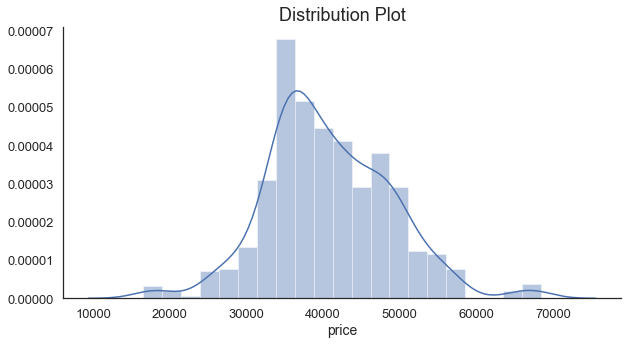

In [114]:
print(df_tacoma[TARGET].skew())
dist_plots(df_tacoma[TARGET])

In [115]:
# Convert the Categorical variables to one-hot encoded features
def create_one_hot(df, categ_colum):
    df = pd.get_dummies(df, columns=categ_colum)
    return df

In [116]:
object_cols.remove('city')

In [117]:
object_cols.remove('dealer')

In [118]:
object_cols

['model', 'trim', 'driveline', 'transmission']

In [119]:
df_car = create_one_hot(df_tacoma, object_cols)

In [120]:
df_car.head()

,price,mileage,cylinder,daysOnMarket,city,dealer,year_old,model_toyota_tacoma,trim_Limited,trim_Limited HV,trim_PreRunner V6,trim_SR,trim_SR V6,trim_SR5,trim_SR5 V6,trim_TRD Off-Road,trim_TRD PreRunner,trim_TRD Pro,trim_TRD Pro HV,trim_TRD Sport,trim_TRD Sport HV,trim_Trailhunter HV,trim_V6,driveline_4X4,driveline_RWD,transmission_automatic,transmission_manual
0,34599,59972.0,6.0,24,Montclair,IE Motors Direct,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
11,36664,21516.0,6.0,51,Santa Ana,California Motors Direct,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
15,51599,0.0,4.0,55,Santa Ana,California Motors Direct,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
17,44699,41617.0,6.0,122,Santa Ana,California Motors Direct,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
20,36599,22247.0,6.0,57,Santa Ana,California Motors Direct,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [121]:
object_cols, num_cols, feature_cols = get_all_cols(df_car, "price", ["city","dealer"])

In [122]:
feature_cols

['mileage',
 'cylinder',
 'daysOnMarket',
 'year_old',
 'model_toyota_tacoma',
 'trim_Limited',
 'trim_Limited HV',
 'trim_PreRunner V6',
 'trim_SR',
 'trim_SR V6',
 'trim_SR5',
 'trim_SR5 V6',
 'trim_TRD Off-Road',
 'trim_TRD PreRunner',
 'trim_TRD Pro',
 'trim_TRD Pro HV',
 'trim_TRD Sport',
 'trim_TRD Sport HV',
 'trim_Trailhunter HV',
 'trim_V6',
 'driveline_4X4',
 'driveline_RWD',
 'transmission_automatic',
 'transmission_manual']

In [123]:
feature_cols_plus_target = [TARGET] + feature_cols

In [124]:
feature_cols_plus_target

['price',
 'mileage',
 'cylinder',
 'daysOnMarket',
 'year_old',
 'model_toyota_tacoma',
 'trim_Limited',
 'trim_Limited HV',
 'trim_PreRunner V6',
 'trim_SR',
 'trim_SR V6',
 'trim_SR5',
 'trim_SR5 V6',
 'trim_TRD Off-Road',
 'trim_TRD PreRunner',
 'trim_TRD Pro',
 'trim_TRD Pro HV',
 'trim_TRD Sport',
 'trim_TRD Sport HV',
 'trim_Trailhunter HV',
 'trim_V6',
 'driveline_4X4',
 'driveline_RWD',
 'transmission_automatic',
 'transmission_manual']

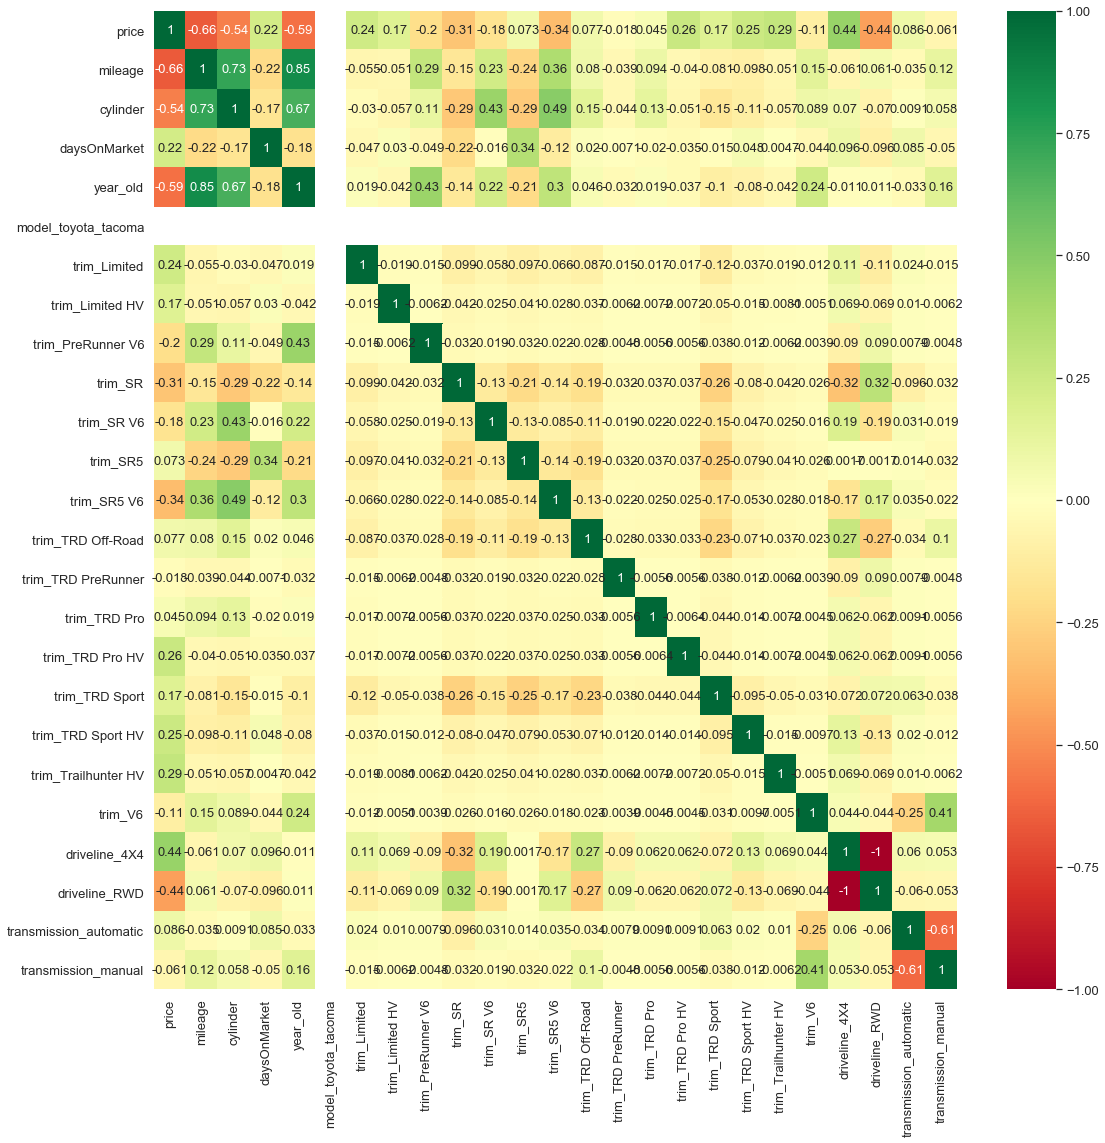

In [125]:
heatmap_df = df_car[feature_cols_plus_target]

plt.figure(figsize = (18,18))
sns.heatmap(heatmap_df.corr(), annot=True, cmap="RdYlGn")

plt.show()

In [126]:
X = df_car[feature_cols]
y = df_car[TARGET]

In [127]:
X

,mileage,cylinder,daysOnMarket,year_old,model_toyota_tacoma,trim_Limited,trim_Limited HV,trim_PreRunner V6,trim_SR,trim_SR V6,trim_SR5,trim_SR5 V6,trim_TRD Off-Road,trim_TRD PreRunner,trim_TRD Pro,trim_TRD Pro HV,trim_TRD Sport,trim_TRD Sport HV,trim_Trailhunter HV,trim_V6,driveline_4X4,driveline_RWD,transmission_automatic,transmission_manual
0,59972.0,6.0,24,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
11,21516.0,6.0,51,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
15,0.0,4.0,55,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
17,41617.0,6.0,122,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
20,22247.0,6.0,57,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4550,26369.0,6.0,36,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4612,22456.0,6.0,35,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4645,22456.0,6.0,35,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
4662,25603.0,6.0,25,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [128]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [129]:
print(selection.feature_importances_)

[0.16351417 0.20822546 0.03172996 0.07575693 0.         0.01294983
 0.00679659 0.00876483 0.20345614 0.0008588  0.06362925 0.00461523
 0.00227754 0.0002338  0.01211455 0.03031848 0.01001126 0.00672922
 0.03264585 0.00090615 0.0615654  0.06229903 0.00037535 0.00022618]


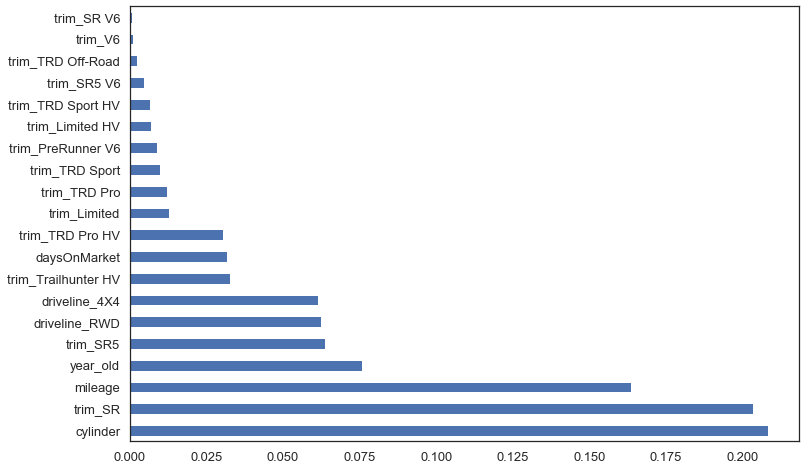

In [130]:
plt.figure(figsize=(12,8))
feat_importance = pd.Series(selection.feature_importances_, index=X.columns)
feat_importance.nlargest(20).plot(kind='barh')
plt.show()

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
xgboost_model = XGBRegressor(n_jobs=-1)

hist_rf_model = rf_model.fit(X_train, y_train)
hist_xgboost_model = xgboost_model.fit(X_train, y_train)

In [133]:
y_pred_rf = rf_model.predict(X_test)
y_pred_xgboost = xgboost_model.predict(X_test)

In [135]:
print(rf_model.score(X_train, y_train))
print(xgboost_model.score(X_train, y_train))

0.988932255103279
0.9965897508306213


In [136]:
print(rf_model.score(X_test, y_pred_rf))
print(xgboost_model.score(X_test, y_pred_xgboost))

1.0
1.0


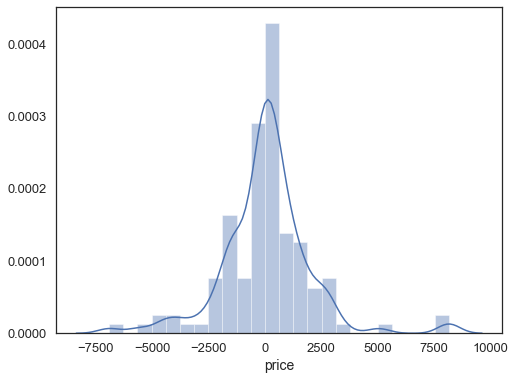

In [138]:
sns.distplot(y_test  - y_pred_rf)
plt.show()

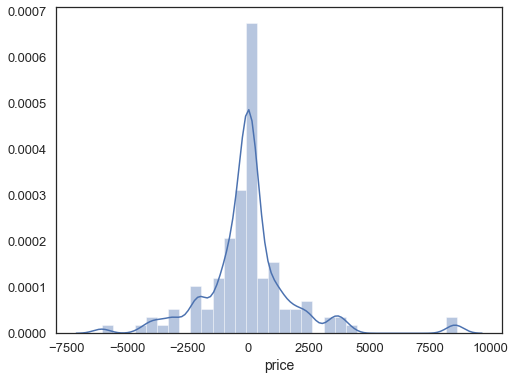

In [139]:
sns.distplot(y_test-y_pred_xgboost)
plt.show()

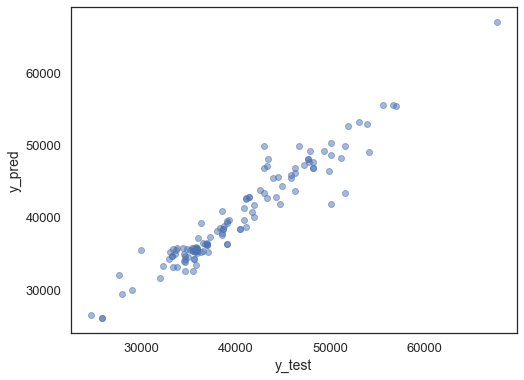

In [140]:
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

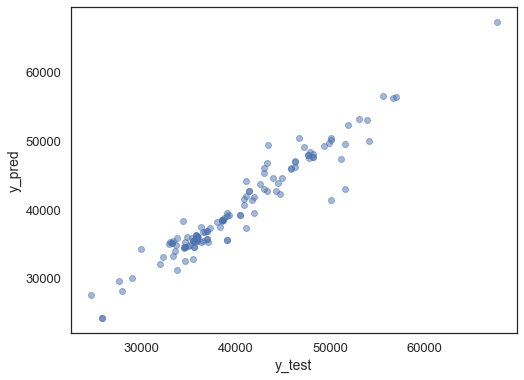

In [144]:
plt.scatter(y_test, y_pred_xgboost, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [146]:
from sklearn import metrics

In [147]:
print('RandomForest')
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))

print('XGBoost')
print('MAE:',metrics.mean_absolute_error(y_test, y_pred_xgboost))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_xgboost))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgboost)))

RandomForest
MAE: 1321.3923046695882
MSE: 4031729.6905739503
RMSE: 2007.9167538954273
XGBoost
MAE: 1148.221447172619
MSE: 3594936.9139413377
RMSE: 1896.0318863197786


In [148]:
metrics.r2_score(y_test, y_pred_rf)

0.9224031650157252

In [149]:
metrics.r2_score(y_test, y_pred_xgboost)

0.9308099133872558

In [150]:
from sklearn.model_selection import RandomizedSearchCV

In [151]:
params = {
    'learning_rate': [0.05,0.10,0.15,0.20,0.25,0.30],
    'max_depth': [3,4,5,6,8,10,12,15],
    'min_child_weight': [1,3,5,7],
    'gamma': [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3,0.4,0.5,0.7]
}

In [152]:
xgb_model_tuned = RandomizedSearchCV(estimator=xgboost_model,param_distributions=params,scoring='neg_mean_squared_error',n_iter=50,cv=5,random_state=42,n_jobs=1)

In [153]:
xgb_model_tuned.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=0, gpu_id=-1,
                                          grow_policy='depthwise',
                                          importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.3000000...
                   iid='deprecated', n_iter=50, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                         

In [154]:
xgb_model_tuned.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.3,
 'gamma': 0.1,
 'colsample_bytree': 0.5}

In [155]:
prediction = xgb_model_tuned.predict(X_test)

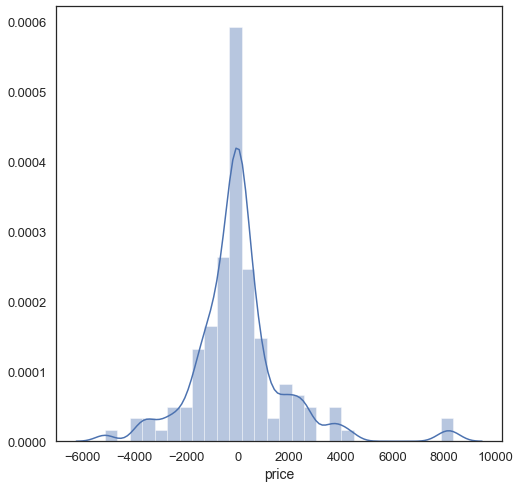

In [156]:
plt.figure(figsize=(8,8))
sns.distplot(y_test-prediction)
plt.show()

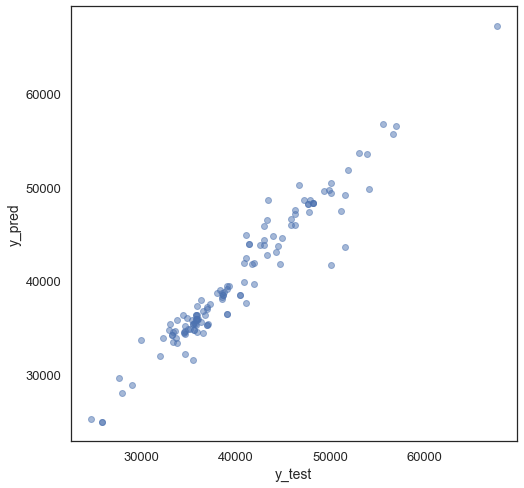

In [157]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,prediction,alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [158]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1148.394035218254
MSE: 3304243.569233304
RMSE: 1817.7578411970346


In [159]:
metrics.r2_score(y_test,prediction)

0.9364047536249517

In [202]:
import pickle
file = open('xgboost_tuned.pkl','wb')

pickle.dump(xgb_model_tuned,file)

In [161]:
model = open('xgboost_tuned.pkl','rb')
xgboost = pickle.load(model)

In [162]:
y_prediction = xgboost.predict(X_test)

In [163]:
metrics.r2_score(y_test,y_prediction)

0.9364047536249517

In [165]:
df_all.to_csv('cars_data.csv')

In [168]:
X_test.head()

,mileage,cylinder,daysOnMarket,year_old,model_toyota_tacoma,trim_Limited,trim_Limited HV,trim_PreRunner V6,trim_SR,trim_SR V6,trim_SR5,trim_SR5 V6,trim_TRD Off-Road,trim_TRD PreRunner,trim_TRD Pro,trim_TRD Pro HV,trim_TRD Sport,trim_TRD Sport HV,trim_Trailhunter HV,trim_V6,driveline_4X4,driveline_RWD,transmission_automatic,transmission_manual
3212,10.0,4.0,15,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3464,0.0,4.0,59,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1752,10.0,4.0,13,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1738,10.0,4.0,16,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3393,16938.0,4.0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0


In [184]:
data = {
    'mileage' : [30817, 64536, 14565],
    'cylinder' : [6, 6, 6],
    'daysOnMarket' : [30, 30, 30],
    'year_old' : [2, 1, 1],
    'model_toyota_tacoma' : [1, 1, 1],
    'trim_Limited' : [0, 0, 0],
    'trim_Limited HV' : [0, 0, 0],
    'trim_PreRunner V6' : [0, 0, 0],
    'trim_SR' : [0, 0, 0],
    'trim_SR V6' : [0, 0, 0],
    'trim_SR5' : [0, 0, 0],
    'trim_SR5 V6' : [0, 0, 1],
    'trim_TRD Off-Road' : [0, 0, 0],
    'trim_TRD PreRunner' : [0, 0, 0],
    'trim_TRD Pro' : [1, 1, 0],
    'trim_TRD Pro HV' : [0, 0, 0],
    'trim_TRD Sport' : [0, 0, 0],
    'trim_TRD Sport HV' : [0, 0, 0],
    'trim_Trailhunter HV' : [0, 0, 0],
    'trim_V6' : [0, 0, 0],
    'driveline_4X4' : [1, 1, 1],
    'driveline_RWD' : [0, 0, 0],
    'transmission_automatic' : [1, 1, 1],
    'transmission_manual' : [0, 0, 0]
}

actual = np.array([49975, 48975, 42975])

df = pd.DataFrame(data)

In [203]:
print(df)

   mileage  cylinder  daysOnMarket  year_old  model_toyota_tacoma  \
0    30817         6            30         2                    1   
1    64536         6            30         1                    1   
2    14565         6            30         1                    1   

   trim_Limited  trim_Limited HV  trim_PreRunner V6  trim_SR  trim_SR V6  \
0             0                0                  0        0           0   
1             0                0                  0        0           0   
2             0                0                  0        0           0   

   trim_SR5  trim_SR5 V6  trim_TRD Off-Road  trim_TRD PreRunner  trim_TRD Pro  \
0         0            0                  0                   0             1   
1         0            0                  0                   0             1   
2         0            1                  0                   0             0   

   trim_TRD Pro HV  trim_TRD Sport  trim_TRD Sport HV  trim_Trailhunter HV  \
0              

In [206]:
import xgboost as xgb

xgb.__version__

'1.6.2'

In [177]:
y_prediction_test = xgboost.predict(df)

In [178]:
y_prediction_test[:]

array([43420.906, 43780.207, 34425.527], dtype=float32)

In [195]:
test_data = pd.DataFrame([y_prediction_test, actual, y_prediction_test - actual], columns = [1, 2, 3])

In [201]:
test_data

,1,2,3
0,"$43,420.91",43780.207031,34425.527344
1,"$49,975.00",48975.000000,42975.000000
2,"$-6,554.09",-5194.792969,-8549.472656


In [200]:
test_data[1] = test_data[1].apply(lambda x: '${:,.2f}'.format(x))
test_data[2] = test_data[2].apply(lambda x: '${:,.2f}'.format(x))
test_data[0] = test_data[0].apply(lambda x: '${:,.2f}'.format(x))

ValueError: Unknown format code 'f' for object of type 'str'

In [187]:
y_prediction_test[:], actual, y_prediction_test - actual

(array([43420.906, 43780.207, 34425.527], dtype=float32),
 array([49975, 48975, 42975]),
 array([-6554.09375   , -5194.79296875, -8549.47265625]))

In [192]:
test_data

,prediction,actual,difference
0,"$43,420.91","$43,780.21","$34,425.53"
1,"$49,975.00","$48,975.00","$42,975.00"
2,"$-6,554.09","$-5,194.79","$-8,549.47"
